# CNN

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
Data_path="./"

## Reshape images in ANN

In [3]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)

print("X_train new shape", x_train.shape)
print("X_test new shape", x_test.shape)

X_train shape (60000, 28, 28)
X_test shape (10000, 28, 28)
X_train new shape (60000, 784)
X_test new shape (10000, 784)


In [4]:
num_classes=10
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(20, activation='sigmoid'))
model.add(layers.Dense(20, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,epochs=2)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6135 - loss: 1.5447
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8974 - loss: 0.4012


## Convolution Layer

In [5]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

X_train shape (60000, 28, 28)
X_test shape (10000, 28, 28)


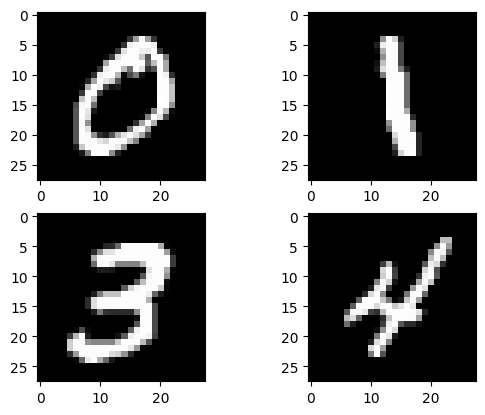

In [6]:
# Plot 4 images as gray scale

%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[6], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

## Random kernel_initializer

Actual Image


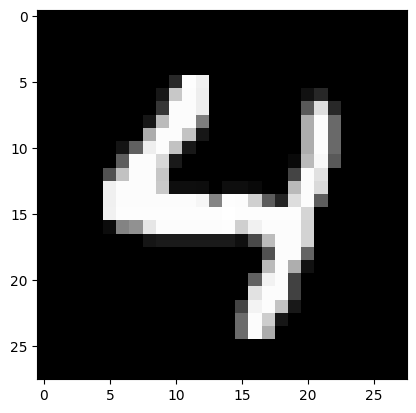

Random Weights Kennel


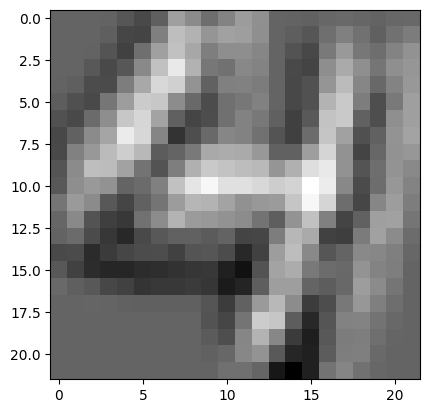

In [7]:
from keras.layers import Input

#i=int(np.random.rand(1,1)*60000)
#634 #924 #952 #3611  #4458
import numpy as np
x=X_train[3611]


print("Actual Image")
plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.show()


print("Random Weights Kennel")
from tensorflow.keras.layers import Conv2D
model=Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters=1,
                 kernel_size=7,
                 name='conv1',
                 kernel_initializer='random_uniform'))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape, verbose=0)
pixels = np.matrix(img_reshape[:][:][:][0])
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

In [9]:
model.layers[0].weights[0]
#gr = tf.get_default_graph()


<Variable path=sequential_1/conv1/kernel, shape=(7, 7, 1, 1), dtype=float32, value=[[[[ 0.01403338]]

  [[-0.01033553]]

  [[ 0.0110737 ]]

  [[-0.03890208]]

  [[-0.03343865]]

  [[-0.03738152]]

  [[ 0.01906114]]]


 [[[ 0.00858542]]

  [[ 0.02619084]]

  [[ 0.00700907]]

  [[-0.0429999 ]]

  [[ 0.01232079]]

  [[-0.01713662]]

  [[-0.01057761]]]


 [[[ 0.03314055]]

  [[-0.02809788]]

  [[-0.03124508]]

  [[ 0.00413489]]

  [[ 0.0435542 ]]

  [[ 0.04995776]]

  [[-0.01916623]]]


 [[[ 0.00310607]]

  [[-0.03147984]]

  [[-0.02476035]]

  [[-0.03565086]]

  [[ 0.01496677]]

  [[-0.01498545]]

  [[ 0.0240834 ]]]


 [[[-0.00232045]]

  [[ 0.00721652]]

  [[ 0.01435628]]

  [[ 0.04338035]]

  [[ 0.01970455]]

  [[ 0.04572326]]

  [[-0.02573625]]]


 [[[ 0.04577956]]

  [[ 0.01123305]]

  [[ 0.02105824]]

  [[-0.0251199 ]]

  [[ 0.04259647]]

  [[-0.0012229 ]]

  [[-0.03358145]]]


 [[[ 0.041576  ]]

  [[ 0.00791633]]

  [[-0.02254465]]

  [[ 0.03360054]]

  [[ 0.03969974]]

  [[ 0.00918

### Constant kernel_initializer

In [10]:
import numpy as np
filter1=np.array([[1,1,1,1,1,1,1],
           [1,1,1,1,1,1,1],
           [100,100,100,100,100,100,100],
           [100,100,100,100,100,100,100],
           [100,100,100,100,100,100,100],
           [1,1,1,1,1,1,1],
           [1,1,1,1,1,1,1]])
print("filter1 \n", filter1)

filter2=np.transpose(filter1)
print("filter2 \n",filter2)

filter1 
 [[  1   1   1   1   1   1   1]
 [  1   1   1   1   1   1   1]
 [100 100 100 100 100 100 100]
 [100 100 100 100 100 100 100]
 [100 100 100 100 100 100 100]
 [  1   1   1   1   1   1   1]
 [  1   1   1   1   1   1   1]]
filter2 
 [[  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]]


In [14]:
import numpy as np
filter1=np.array([[0,0,0,0,0,0,0],
           [0,0,0,0,0,0,0],
           [0,0,0,0,0,0,0],
           [100,100,100,100,100,100,100],
           [0,0,0,0,0,0,0],
           [0,0,0,0,0,0,0],
           [0,0,0,0,0,0,0]])
print("filter1 \n", filter1)

filter2=np.transpose(filter1)
print("filter2 \n",filter2)

filter1 
 [[  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [100 100 100 100 100 100 100]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]
filter2 
 [[  0   0   0 100   0   0   0]
 [  0   0   0 100   0   0   0]
 [  0   0   0 100   0   0   0]
 [  0   0   0 100   0   0   0]
 [  0   0   0 100   0   0   0]
 [  0   0   0 100   0   0   0]
 [  0   0   0 100   0   0   0]]


In [16]:
import numpy as np
filter1=np.array([[100,0,0,0,0,0,100],
           [0,100,0,0,0,100,0],
           [0,0,100,0,100,0,0],
           [0,0,0,100,0,0,0],
           [0,0,100,0,100,0,0],
           [0,100,0,0,0,100,0],
           [100,0,0,0,0,0,100]])
print("filter1 \n", filter1)

filter2=np.transpose(filter1)
print("filter2 \n",filter2)

filter1 
 [[100   0   0   0   0   0 100]
 [  0 100   0   0   0 100   0]
 [  0   0 100   0 100   0   0]
 [  0   0   0 100   0   0   0]
 [  0   0 100   0 100   0   0]
 [  0 100   0   0   0 100   0]
 [100   0   0   0   0   0 100]]
filter2 
 [[100   0   0   0   0   0 100]
 [  0 100   0   0   0 100   0]
 [  0   0 100   0 100   0   0]
 [  0   0   0 100   0   0   0]
 [  0   0 100   0 100   0   0]
 [  0 100   0   0   0 100   0]
 [100   0   0   0   0   0 100]]


Actual Image


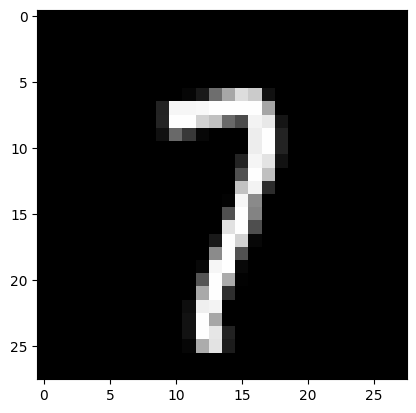

Horizontal Line


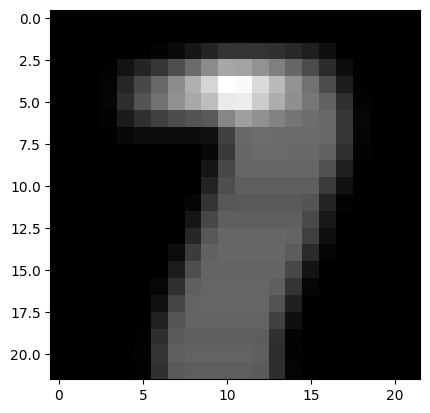

Vertical Line


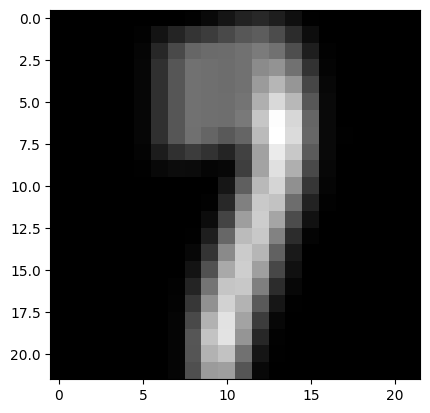

In [11]:
from keras.layers import Input

#Try #634 #924 #952 #3611  #4458
x=X_train[634]

print("Actual Image")
plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.show()

print("Horizontal Line")

model=Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(1,
                 kernel_size=7,
                 kernel_initializer=keras.initializers.Constant(filter1.reshape(7,7,1,1))))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape, verbose=0)
pixels = np.matrix(img_reshape[:][:][:][0])
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

print("Vertical Line")
model=Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(1,
                 kernel_size=7,
                 kernel_initializer=keras.initializers.Constant(filter2.reshape(7,7,1,1))))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape, verbose=0)
pixels = np.matrix(img_reshape[:][:][:][0])
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

Actual Image


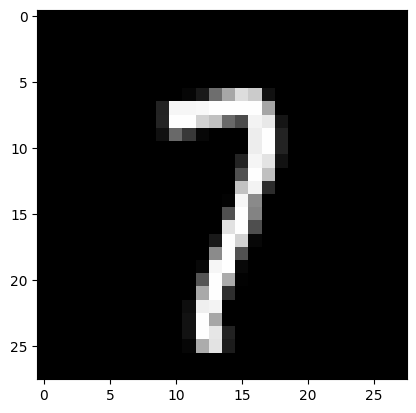

Horizontal Line


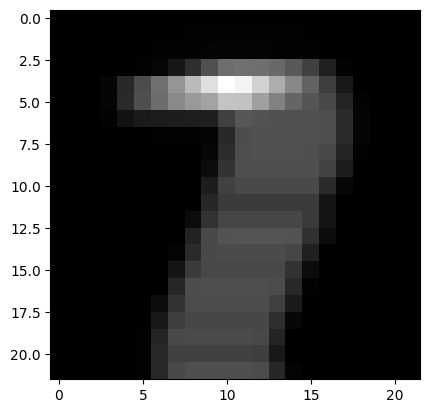

Vertical Line


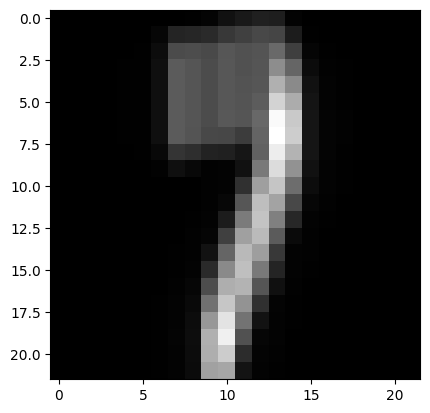

In [13]:
from keras.layers import Input

#Try #634 #924 #952 #3611  #4458
x=X_train[634]

print("Actual Image")
plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.show()

print("Horizontal Line")

model=Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(1,
                 kernel_size=7,
                 kernel_initializer=keras.initializers.Constant(filter1.reshape(7,7,1,1))))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape, verbose=0)
pixels = np.matrix(img_reshape[:][:][:][0])
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

print("Vertical Line")
model=Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(1,
                 kernel_size=7,
                 kernel_initializer=keras.initializers.Constant(filter2.reshape(7,7,1,1))))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape, verbose=0)
pixels = np.matrix(img_reshape[:][:][:][0])
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

Actual Image


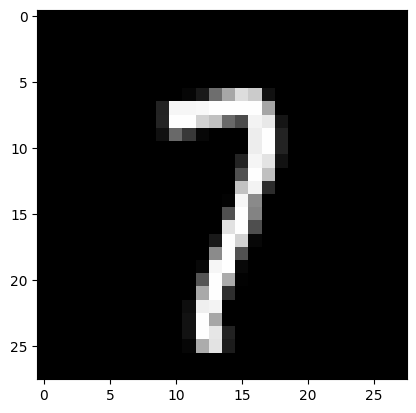

Horizontal Line


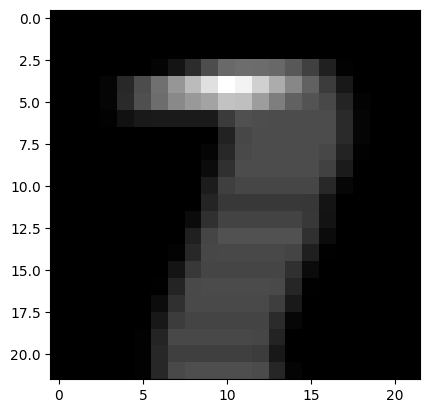

Vertical Line


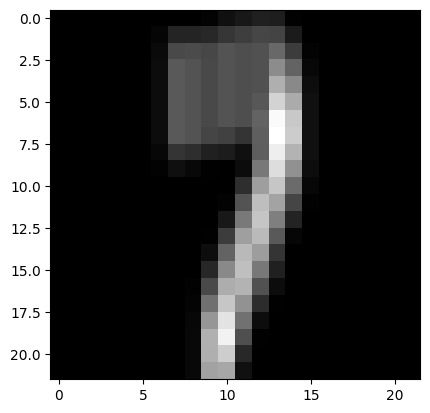

In [15]:
from keras.layers import Input

#Try #634 #924 #952 #3611  #4458
x=X_train[634]

print("Actual Image")
plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.show()

print("Horizontal Line")

model=Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(1,
                 kernel_size=7,
                 kernel_initializer=keras.initializers.Constant(filter1.reshape(7,7,1,1))))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape, verbose=0)
pixels = np.matrix(img_reshape[:][:][:][0])
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

print("Vertical Line")
model=Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(1,
                 kernel_size=7,
                 kernel_initializer=keras.initializers.Constant(filter2.reshape(7,7,1,1))))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape, verbose=0)
pixels = np.matrix(img_reshape[:][:][:][0])
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

Actual Image


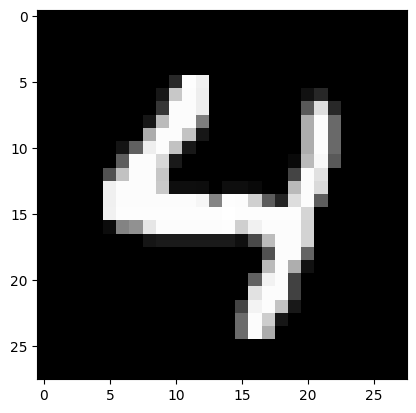

Horizontal Line


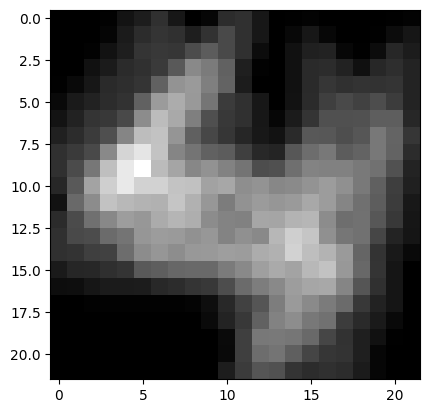

Vertical Line


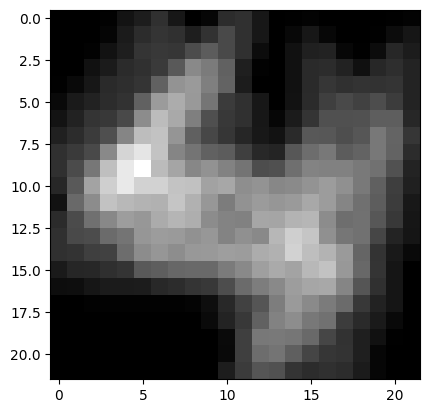

In [19]:
from keras.layers import Input

#Try #634 #924 #952 #3611  #4458
x=X_train[3611]

print("Actual Image")
plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.show()

print("Horizontal Line")

model=Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(1,
                 kernel_size=7,
                 kernel_initializer=keras.initializers.Constant(filter1.reshape(7,7,1,1))))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape, verbose=0)
pixels = np.matrix(img_reshape[:][:][:][0])
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

print("Vertical Line")
model=Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(1,
                 kernel_size=7,
                 kernel_initializer=keras.initializers.Constant(filter2.reshape(7,7,1,1))))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape, verbose=0)
pixels = np.matrix(img_reshape[:][:][:][0])
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

### Filters for Colour Images

40189
(28, 28)
[[132 216  52 248 248]
 [176   0 232   0   0]
 [ 52   0   0   0   0]
 [140 248 248 248 248]
 [196 216 196 216 196]]
(5, 5)


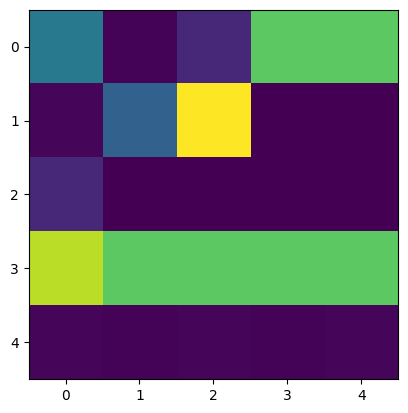

In [20]:
i = np.random.randint(1, 60000)
print(i)

%matplotlib inline

x = X_train[i]
print(x.shape)
y=x[10:15,10:15]
print(y*20)
print(y.shape)
plt.imshow((y*255).astype(np.uint8))

## Zero Padding 

Actual Image Shape  (28, 28)


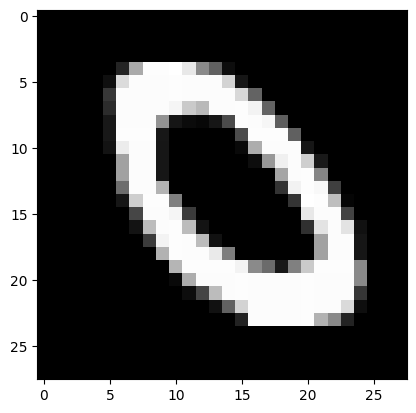

Random Weights Kennel siz3 7X7
Output Shape  (22, 22)


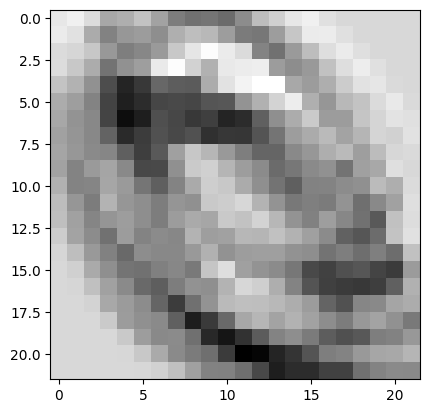

Random Weights Kennel siz3 5X5
Output Shape  (24, 24)


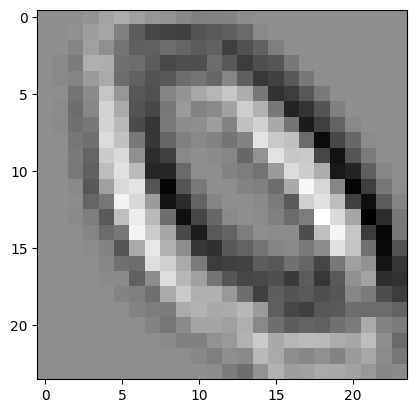

In [21]:
i = np.random.randint(0, 60000)
#634 #924 #952 #3611  #4458
import numpy as np
x=X_train[i]

print("Actual Image Shape " ,  x.shape)
plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.show()


print("Random Weights Kennel siz3 7X7")
from tensorflow.keras.layers import Conv2D
model=Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters=1,
                 kernel_size=7,
                 kernel_initializer='random_uniform'))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape, verbose=0)
pixels = np.matrix(img_reshape[:][:][:][0])
print("Output Shape " ,pixels.shape)
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()


print("Random Weights Kennel siz3 5X5")
from tensorflow.keras.layers import Conv2D
model=Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters=1,
                 kernel_size=5,
                 kernel_initializer='random_uniform'))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape, verbose=0)
pixels = np.matrix(img_reshape[:][:][:][0])
print("Output Shape " ,pixels.shape)
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

## CNN for CIFAR10

In [22]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [23]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train=X_train/255
X_test=X_test/255

In [24]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (50000, 32, 32, 3)
y_train.shape (50000, 1)
X_test.shape (10000, 32, 32, 3)
y_test.shape (10000, 1)


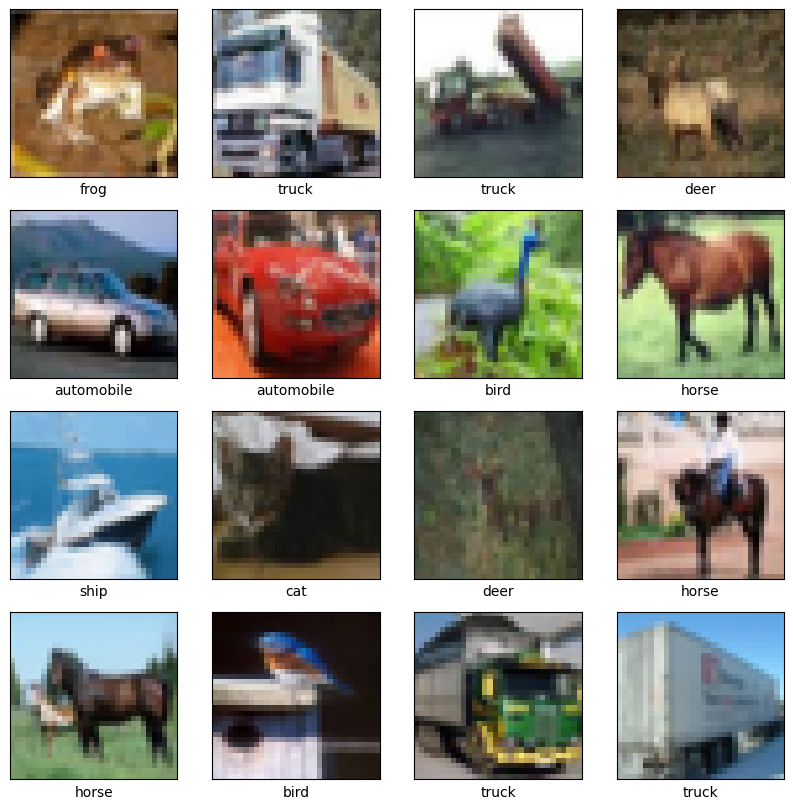

In [25]:
#Drawing Few images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [26]:
model = models.Sequential()
model.add(Input(shape=(32,32,3)))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,570 (885.04 KB)

 Trainable params: 226,570 (885.04 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
import time #To measure the execution time 
start = time.time()

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train, y_train, 
          batch_size=16,
          epochs=5, 
          validation_data=(X_test, y_test))

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.2395 - loss: 2.0415 - val_accuracy: 0.4378 - val_loss: 1.5545
Epoch 2/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.4695 - loss: 1.4739 - val_accuracy: 0.5452 - val_loss: 1.2760
Epoch 3/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5488 - loss: 1.2686 - val_accuracy: 0.5739 - val_loss: 1.1875
Epoch 4/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.6058 - loss: 1.1212 - val_accuracy: 0.6344 - val_loss: 1.0520
Epoch 5/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.6494 - loss: 1.0034 - val_accuracy: 0.6450 - val_loss: 1.0309
Execution time is 105 seconds


## Case Study- Sign Language Reading from Images 

In [29]:
# download the dataset
import gdown
datafile = gdown.download("https://drive.google.com/file/d/1HSz6mRGzVuZGXFSM9omoK7D63sn2sZLp/view?usp=sharing", fuzzy=True)
print("data file downloaded at :", datafile)


Downloading...
From (original): https://drive.google.com/uc?id=1HSz6mRGzVuZGXFSM9omoK7D63sn2sZLp
From (redirected): https://drive.google.com/uc?id=1HSz6mRGzVuZGXFSM9omoK7D63sn2sZLp&confirm=t&uuid=bebe9546-3915-43f2-a569-acab06dcddd2
To: c:\Gokul\Github Repos\GenAI_AUKBC\6. Neural Networks\CNN\sign-language-dataset.zip
100%|██████████| 52.6M/52.6M [00:21<00:00, 2.49MB/s]

data file downloaded at : sign-language-dataset.zip


In [115]:
# extract the files.
!unzip -qu sign-language-dataset.zip

In [31]:
#Let us keep all the libraries ready
import tensorflow.keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D,  Activation
from tensorflow.keras.layers import Reshape, Input, Lambda
from tensorflow.keras.layers import Conv2D, Convolution2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Concatenate, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from matplotlib.pyplot import imshow, imsave
import imageio.v2 as imageio
import random

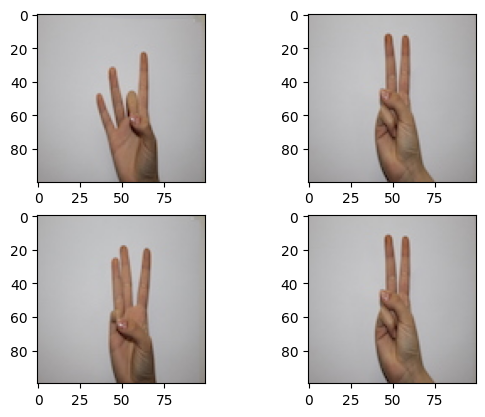

In [33]:
#Few random Images
fig, ax = plt.subplots(2,2)
location=Data_path+'sign-language-dataset/Sign_Language_Digits/Sign-Language-Digits-Dataset-master/Dataset/'
i=random.randint(1, 9)
img_id=18+i
img=imageio.imread(location+str(i)+"/IMG_11"+str(img_id)+".JPG")
ax[0,0].imshow(img)

i=random.randint(1, 9)
img_id=18+i
img=imageio.imread(location+str(i)+"/IMG_11"+str(img_id)+".JPG")
ax[0,1].imshow(img)

i=random.randint(1, 9)
img_id=18+i
img=imageio.imread(location+str(i)+"/IMG_11"+str(img_id)+".JPG")
ax[1,0].imshow(img)

i=random.randint(1, 9)
img_id=18+i
img=imageio.imread(location+str(i)+"/IMG_11"+str(img_id)+".JPG")
ax[1,1].imshow(img)

In [34]:
########################
# Generators
########################

from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 256
target_size = (100,100)


########################
# Data Directory
########################

data_dir = location  # this is the image datasets directory
location_1=Data_path+"Sign_language_digits_dataset_64_64/"
########################
# Data generator : Any preprocessing options/steps can be  defined here
########################
datagen = ImageDataGenerator(rescale = 1./255,  # scaling the images matrix(standard preprocessing step)
                             validation_split=0.2) # set validation split

########################
# Train generator
########################
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,   # resizing the input images to a specific size
    batch_size=batch_size,     # Batch size, iterator will generate a random batch with this size
    color_mode = 'grayscale',  # keeping the channel to grayscale for easy calculations
    class_mode='categorical',
    shuffle=True,
    subset="training") 

########################
# Validation generator
########################

validation_generator = datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    color_mode = 'grayscale', 
    class_mode='categorical',
    shuffle=True,
    subset="validation") # set as validation data

Found 1641 images belonging to 10 classes.
Found 405 images belonging to 10 classes.


In [35]:
model1 = Sequential()

model1.add(Input(shape=(100,100,1)))
# Convolution layer
model1.add(Conv2D(64, (3, 3), activation = 'relu'))

# Pooling layer
model1.add(MaxPooling2D(pool_size = (2, 2)))

# Adding second convolutional layer
model1.add(Conv2D(64, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

# Adding third convolutional layer
model1.add(Conv2D(64, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
model1.add(Flatten())

# Step 4 - Fully connected dense layers
model1.add(Dense(units = 256, activation = 'relu'))
model1.add(Dense(units = 10, activation = 'softmax'))

model1.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 47, 47, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,715,722 (6.54 MB)

 Trainable params: 1,715,722 (6.54 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# model1 compilation
model1.compile(optimizer =SGD(learning_rate=0.01, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

model1.fit(
        train_generator, 
        #steps_per_epoch = len(train_generator), #total number of batches in one train epoch(train observation/batch size; also called iterations per epoch)
        epochs=5,
        validation_data = validation_generator,
        #validation_steps = len(validation_generator), #total number of batches in validation(validation observation/batch size)
        verbose=1)

model1.save_weights('m1_Sign_Language_20epochs.weights.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

c:\Gokul\Github Repos\GenAI_AUKBC\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.1029 - loss: 2.3057 - val_accuracy: 0.1333 - val_loss: 2.3008
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.1228 - loss: 2.2978 - val_accuracy: 0.1407 - val_loss: 2.2987
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.1752 - loss: 2.2939 - val_accuracy: 0.1259 - val_loss: 2.2957
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.1592 - loss: 2.2889 - val_accuracy: 0.2469 - val_loss: 2.2906
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.2570 - loss: 2.2806 - val_accuracy: 0.1506 - val_loss: 2.2839
Execution time is 66 seconds


In [38]:
model1.load_weights(Data_path+"sign-language-dataset/Pre_trained_models/m1_Sign_Language_20epochs.h5")

model1.fit(
        train_generator, 
        #steps_per_epoch = len(train_generator), 
        epochs=2,
        validation_data = validation_generator,
        #validation_steps = len(validation_generator), 
        verbose=1)

Epoch 1/2
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 821ms/step - accuracy: 0.8974 - loss: 0.3183 - val_accuracy: 0.5951 - val_loss: 1.7939
Epoch 2/2
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 781ms/step - accuracy: 0.8843 - loss: 0.3533 - val_accuracy: 0.5753 - val_loss: 2.0217


In [39]:
model1.load_weights(Data_path+"sign-language-dataset/Pre_trained_models/m1_Sign_Language_50epochs.h5")

model1.fit(
        train_generator, 
        #steps_per_epoch = len(train_generator), 
        epochs=2,
        validation_data = validation_generator,
        #validation_steps = len(validation_generator), 
        verbose=1)

Epoch 1/2
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 716ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.6716 - val_loss: 2.0402
Epoch 2/2
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 724ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 0.6741 - val_loss: 2.0005


# Model2 - Model with Receptive field 

Change the image shape to 64X64 

In [40]:
########################
# Generators
########################

from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 256
target_size = (64,64)


########################
# Data Directory
########################

data_dir = location  # this is the image datasets directory

########################
# Data generator : Any preprocessing options/steps can be  defined here
########################
datagen = ImageDataGenerator(rescale = 1./255,  # scaling the images matrix(standard preprocessing step)
                             validation_split=0.2) # set validation split

########################
# Train generator
########################
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,   # resizing the input images to a specific size
    batch_size=batch_size,     # Batch size, iterator will generate a random batch with this size
    color_mode = 'grayscale',  # keeping the channel to grayscale for easy calculations
    class_mode='categorical',
    shuffle=True,
    subset="training") # set as training data

########################
# Validation generator
########################

validation_generator = datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    color_mode = 'grayscale', 
    class_mode='categorical',
    shuffle=True,
    subset="validation") # set as validation data

Found 1641 images belonging to 10 classes.
Found 405 images belonging to 10 classes.


In [41]:
model2 = Sequential()

# Convolution and Pooling layers
model2.add(Conv2D(16, (3, 3), input_shape = (64, 64, 1), activation = 'relu'))
model2.add(Conv2D(32, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))


model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))


# Flattening and  Fully connected dense layers
model2.add(Flatten())
model2.add(Dense(units = 32, activation = 'relu'))
model2.add(Dense(units = 10, activation = 'softmax'))

model2.summary()

c:\Gokul\Github Repos\GenAI_AUKBC\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 62, 62, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 9, 9, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │        65,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,562 (1.33 MB)

 Trainable params: 347,562 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# model compilation
model2.compile(optimizer =SGD(learning_rate=0.01, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

model2.fit(
        train_generator, 
        #steps_per_epoch = len(train_generator), #total number of batches in one train epoch(train observation/batch size; also called iterations per epoch)
        epochs=50,
        validation_data = validation_generator,
        #validation_steps = len(validation_generator), #total number of batches in validation(validation observation/batch size)
        verbose=1)

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 470ms/step - accuracy: 0.0618 - loss: 2.3020 - val_accuracy: 0.1358 - val_loss: 2.3015
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 388ms/step - accuracy: 0.1223 - loss: 2.3011 - val_accuracy: 0.1012 - val_loss: 2.3007
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 388ms/step - accuracy: 0.0969 - loss: 2.3001 - val_accuracy: 0.1012 - val_loss: 2.3004
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 383ms/step - accuracy: 0.1046 - loss: 2.2994 - val_accuracy: 0.1012 - val_loss: 2.2994
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 394ms/step - accuracy: 0.1035 - loss: 2.2977 - val_accuracy: 0.1012 - val_loss: 2.2984
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 440ms/step - accuracy: 0.0959 - loss: 2.2971 - val_accuracy: 0.1037 - val_loss: 2.2971
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 510ms/step - accuracy: 0.1137 - loss: 2.2949 - val_accuracy: 0.1086 - val_loss: 2.2956
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 498ms/step - accuracy: 0.1409 - loss: 2.2919 - val_accuracy: 0.1580 - val_loss:

In [43]:
model2.save_weights('m2_Receptive_field_50epochs.weights.h5')

In [45]:
model2.load_weights(Data_path+"sign-language-dataset/Pre_trained_models/m2_Receptive_field_50epochs.h5")

model2.fit(
        train_generator, 
        #steps_per_epoch = len(train_generator), #total number of batches in one train epoch(train observation/batch size; also called iterations per epoch)
        epochs=2,
        validation_data = validation_generator,
        #validation_steps = len(validation_generator), #total number of batches in validation(validation observation/batch size)
        verbose=1)

Epoch 1/2
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 483ms/step - accuracy: 0.9996 - loss: 0.0198 - val_accuracy: 0.7605 - val_loss: 1.7778
Epoch 2/2
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 393ms/step - accuracy: 0.9998 - loss: 0.0097 - val_accuracy: 0.7481 - val_loss: 1.7012


## Model2 - Model with Dropout and Receptive field 

Batchsize Changed 

In [46]:
########################
# Generators
########################

from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 64
target_size = (64,64)


########################
# Data Directory
########################

data_dir = location  # this is the image datasets directory

########################
# Data generator : Any preprocessing options/steps can be  defined here
########################
datagen = ImageDataGenerator(rescale = 1./255,  # scaling the images matrix(standard preprocessing step)
                             validation_split=0.2) # set validation split

########################
# Train generator
########################
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,   # resizing the input images to a specific size
    batch_size=batch_size,     # Batch size, iterator will generate a random batch with this size
    color_mode = 'grayscale',  # keeping the channel to grayscale for easy calculations
    class_mode='categorical',
    shuffle=True,
    subset="training") # set as training data

########################
# Validation generator
########################

validation_generator = datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    color_mode = 'grayscale', 
    class_mode='categorical',
    shuffle=True,
    subset="validation") # set as validation data

Found 1641 images belonging to 10 classes.
Found 405 images belonging to 10 classes.


In [47]:
model2 = Sequential()

# Convolution and Pooling layers
model2.add(Conv2D(16, (3, 3), input_shape = (64, 64, 1), activation = 'relu'))
model2.add(Conv2D(32, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.5))

model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.5))

model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.5))


# Flattening and  Fully connected dense layers
model2.add(Flatten())
model2.add(Dense(units = 32, activation = 'relu'))
model2.add(Dropout(0.5))

model2.add(Dense(units = 10, activation = 'softmax'))

model2.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 62, 62, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 9, 9, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │        65,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,562 (1.33 MB)

 Trainable params: 347,562 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# model compilation
model2.compile(optimizer =SGD(learning_rate=0.01, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

history=model2.fit(
        train_generator, 
        #steps_per_epoch = len(train_generator), 
        epochs=50,
        validation_data = validation_generator,
        #validation_steps = len(validation_generator), 
        verbose=1)

model2.save_weights('m2_Dropout_Rec_fld_50epochs.weights.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.0752 - loss: 2.3146 - val_accuracy: 0.0938 - val_loss: 2.3024
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.0965 - loss: 2.3028 - val_accuracy: 0.1012 - val_loss: 2.3023
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.1089 - loss: 2.3021 - val_accuracy: 0.1012 - val_loss: 2.3025
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.1004 - loss: 2.3043 - val_accuracy: 0.1012 - val_loss: 2.3023
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.1015 - loss: 2.3026 - val_accuracy: 0.1012 - val_loss: 2.3023
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.0924 - loss: 2.3020 - val_accuracy: 0.1012 - val_loss: 2.3023
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.0943 - loss: 2.3024 - val_accuracy: 0.1012 - val_loss: 2.3021
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.1041 - loss: 2.3014 - val_accuracy: 0.

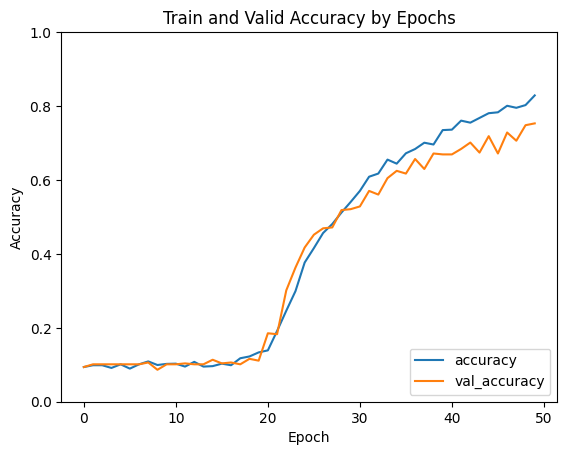

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title("Train and Valid Accu02racy by Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

In [50]:
model2.load_weights(Data_path+"sign-language-dataset/Pre_trained_models/m2_Dropout_Rec_fld_50epochs.h5")

history=model2.fit(
        train_generator, 
        #steps_per_epoch = len(train_generator), 
        epochs=2,
        validation_data = validation_generator,
        #validation_steps = len(validation_generator), 
        verbose=1)

Epoch 1/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 428ms/step - accuracy: 0.8405 - loss: 0.5034 - val_accuracy: 0.8247 - val_loss: 0.5549
Epoch 2/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 392ms/step - accuracy: 0.8269 - loss: 0.4923 - val_accuracy: 0.7926 - val_loss: 0.6110


#### Dropout 100 epochs

In [51]:
model2.load_weights(Data_path+"sign-language-dataset/Pre_trained_models/m2_Dropout_Rec_fld_100epochs.h5")

history=model2.fit(
        train_generator, 
        epochs=2,
        validation_data = validation_generator,
        verbose=1)

Epoch 1/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 351ms/step - accuracy: 0.9428 - loss: 0.1587 - val_accuracy: 0.8667 - val_loss: 0.4023
Epoch 2/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 302ms/step - accuracy: 0.9485 - loss: 0.1645 - val_accuracy: 0.8296 - val_loss: 0.5339


## Batch Normalization

In [52]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape = (32, 32, 1)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(2, (3, 3)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(3, (3, 3)))
model.add(BatchNormalization())

model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 30, 30, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 1)      │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 15, 15, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 15, 15, 1)      │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 13, 13, 2)      │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 2)      │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 6, 6, 2)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 2)        │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 4, 4, 3)        │            57 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4, 4, 3)        │            12 │
│ (BatchNormalization)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123 (492.00 B)

 Trainable params: 105 (420.00 B)

 Non-trainable params: 18 (72.00 B)

## Model3 with Batch Normalization. 

In [53]:
model3 = Sequential()

model3.add(Conv2D(16, (3, 3), input_shape = (64, 64, 1), activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Conv2D(16, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Conv2D(32, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Conv2D(32, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Conv2D(64, (3, 3), activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Flatten())
model3.add(Dense(units = 16, activation = 'relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units = 10, activation = 'softmax'))

model3.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 62, 62, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 62, 62, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 60, 60, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 30, 30, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 6, 6, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │        16,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 52,074 (203.41 KB)

 Trainable params: 51,754 (202.16 KB)

 Non-trainable params: 320 (1.25 KB)

In [54]:
model3.compile(optimizer =SGD(learning_rate=0.03, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

history=model3.fit(
        train_generator, 
        epochs=200,
        validation_data = validation_generator,
        verbose=1)

model3.save_weights('m3_BatchNorm_200epochs.weights.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - accuracy: 0.1290 - loss: 2.7509 - val_accuracy: 0.1012 - val_loss: 26.9226
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.2300 - loss: 2.0830 - val_accuracy: 0.1185 - val_loss: 2.8480
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.2541 - loss: 1.9538 - val_accuracy: 0.0864 - val_loss: 2.7411
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.2860 - loss: 1.8732 - val_accuracy: 0.1284 - val_loss: 2.6880
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.3195 - loss: 1.7588 - val_accuracy: 0.1012 - val_loss: 4.8711
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.3314 - loss: 1.7492 - val_accuracy: 0.1926 - val_loss: 2.5295
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.3605 - loss: 1.7029 - val_accuracy: 0.2000 - val_loss: 2.5287
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.3668 - loss: 1.6556 - val_acc

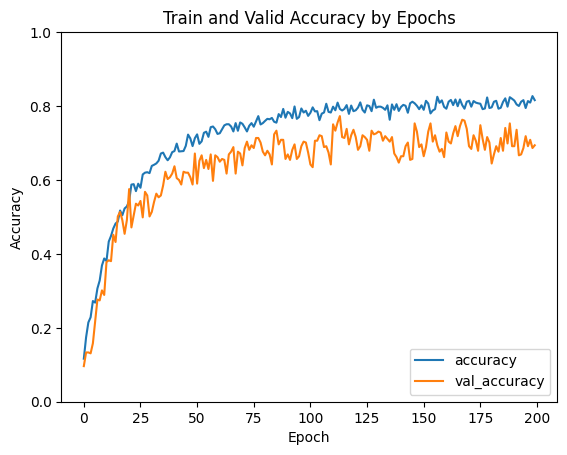

In [ ]:
## Plotting the results 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title("Train and Valid Accuracy by Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

In [55]:
model3.load_weights(Data_path+"sign-language-dataset/Pre_trained_models/m3_BatchNorm_200epochs.h5")

history=model3.fit(
        train_generator, 
        epochs=2,
        validation_data = validation_generator,
        verbose=1)

Epoch 1/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 220ms/step - accuracy: 0.8589 - loss: 0.4571 - val_accuracy: 0.7802 - val_loss: 0.7169
Epoch 2/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.8446 - loss: 0.4965 - val_accuracy: 0.8025 - val_loss: 0.6820


## Adam  Optimizer 

In [56]:
model3.compile(optimizer =Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

history=model3.fit(
        train_generator, 
        epochs=100,
        validation_data = validation_generator,
        verbose=1)

model3.save_weights('m3_BatchNorm_and_Adam_100epochs.weights.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 258ms/step - accuracy: 0.8381 - loss: 0.4852 - val_accuracy: 0.7877 - val_loss: 0.6822
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - accuracy: 0.8383 - loss: 0.5178 - val_accuracy: 0.7926 - val_loss: 0.7833
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.8417 - loss: 0.4572 - val_accuracy: 0.7358 - val_loss: 0.9241
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - accuracy: 0.8255 - loss: 0.5386 - val_accuracy: 0.7580 - val_loss: 0.8072
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.8194 - loss: 0.5464 - val_accuracy: 0.7901 - val_loss: 0.6500
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - accuracy: 0.8358 - loss: 0.4805 - val_accuracy: 0.7778 - val_loss: 0.9320
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - accuracy: 0.8419 - loss: 0.4875 - val_accuracy: 0.8222 - val_loss: 0.7122
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - accuracy: 0.8175 - loss: 0.5809 - val_acc

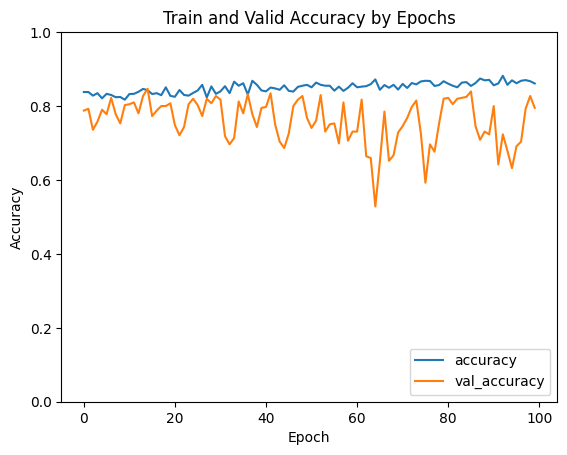

In [57]:
## Plotting the results 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title("Train and Valid Accuracy by Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

In [58]:
model3.load_weights(Data_path+"sign-language-dataset/Pre_trained_models/m3_BatchNorm_and_Adam_100epochs.h5")

history=model3.fit(
        train_generator, 
        epochs=2,
        validation_data = validation_generator,
        verbose=1)

Epoch 1/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 270ms/step - accuracy: 0.8309 - loss: 0.4794 - val_accuracy: 0.7333 - val_loss: 0.7169
Epoch 2/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - accuracy: 0.8045 - loss: 0.6038 - val_accuracy: 0.5432 - val_loss: 2.7243
